## Analysis of Customer Review Sentiment

### Introduction

This notebook uses Python programming language to build a machine learning model to identify the sentiment of customer reviews in a E-Commerce store for Women's Clothing. The information used is a real commercial and anoymised data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Open the dataset and create a Dataframe
df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv')
df.shape

(23486, 11)

In [3]:
df = df.drop(['Unnamed: 0'], axis=1)
df = df.rename(columns = {'Clothing ID': 'Clothing_ID', 'Review Text': 'Review', 'Recommended IND': 'Recommended', 'Positive Feedback Count': 'Positive_feedback_count', 'Division Name': 'Division', 'Department Name': 'Department', 'Class Name': 'Class'})

### General Dataset Exploration

The dataset includes 23486 rows and 10 feature variables, with each row being one customer review. The reviews are for 1206 different clothes items which can be categorised into 3 divisions, 6 departments and 20 classes. All reviews have a associated clothes ID, however, some reviews are not categorised into a division, department or a class. 

The positive feedback count is a positive interger documenting the number of other customers who found this review positive.

The recommanded column is a binary value indicating whether the cusotmer recommends this product, with 1 being recommended and 0 being not recommended.

In [4]:
df.head()

,Clothing_ID,Age,Title,Review,Rating,Recommended,Positive_feedback_count,Division,Department,Class
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
print(pd.isnull(df.Clothing_ID).any(), pd.unique(df.Clothing_ID).shape)
print(pd.unique(df.Division), pd.unique(df.Division).shape)
print(pd.unique(df.Department), pd.unique(df.Department).shape)
print(pd.unique(df.Class), pd.unique(df.Class).shape)

False (1206,)
['Initmates' 'General' 'General Petite' nan] (4,)
['Intimate' 'Dresses' 'Bottoms' 'Tops' 'Jackets' 'Trend' nan] (7,)
['Intimates' 'Dresses' 'Pants' 'Blouses' 'Knits' 'Outerwear' 'Lounge'
 'Sweaters' 'Skirts' 'Fine gauge' 'Sleep' 'Jackets' 'Swim' 'Trend' 'Jeans'
 'Legwear' 'Shorts' 'Layering' 'Casual bottoms' nan 'Chemises'] (21,)


Every review has a valid rating, recommended and positive feedback count value. The distribution of the values in each category is graphed.

In [6]:
print(pd.isnull(df.Rating).any())
print(pd.isnull(df.Recommended).any())
print(pd.isnull(df.Positive_feedback_count).any())

False
False
False


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


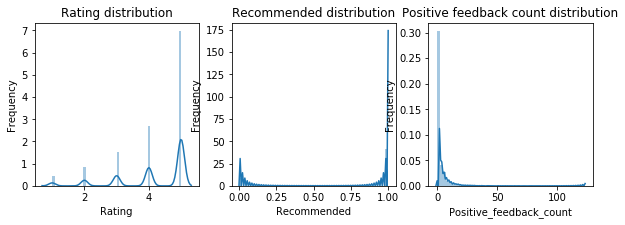

In [7]:
a, ax = plt.subplots(1, 3, figsize=(10, 3), sharey = False)


#Rating distribution
sns.distplot(df.Rating, ax=ax[0])
ax[0].set_title('Rating distribution')
ax[0].set_ylabel('Frequency')

#Recommended distribution
sns.distplot(df.Recommended, ax=ax[1])
ax[1].set_title('Recommended distribution')
ax[1].set_ylabel('Frequency')

#positive feedback count distribution
sns.distplot(df.Positive_feedback_count, ax=ax[2])
ax[2].set_title('Positive feedback count distribution')
ax[2].set_ylabel('Frequency')

plt.show()

### Data Preprocessing

For the purpose of this project, the machine learning model determines whether the customer would recommend the product based on their review. The model does not consider the categories of the clothes and the age of the reviewer.

In [10]:
# Extract useful information from the DataFrame

df_recommended = df.filter(['Title', 'Review', 'Recommended'], axis=1)
df_recommended = df_recommended.fillna("")

# combine title and review as both indicates customer sentiment

df_recommended['Combined_review'] = df_recommended.Title + " " + df_recommended.Review

In [11]:
df_recommended.head()

,Title,Review,Recommended,Combined_review
0,,Absolutely wonderful - silky and sexy and comf...,1,Absolutely wonderful - silky and sexy and com...
1,,Love this dress! it's sooo pretty. i happene...,1,Love this dress! it's sooo pretty. i happen...
2,Some major design flaws,I had such high hopes for this dress and reall...,0,Some major design flaws I had such high hopes ...
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",1,"My favorite buy! I love, love, love this jumps..."
4,Flattering shirt,This shirt is very flattering to all due to th...,1,Flattering shirt This shirt is very flattering...
